In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

In [22]:
# JensonShanon formula
def JS(p, q):
    p1 = p / np.linalg.norm(p, ord=1)
    q1 = q / np.linalg.norm(q, ord=1)
    m = 0.5 * (p1 + q1)
    r = 0.5 * (st.entropy(p1, m) + st.entropy(q1, m))
    return r

In [ ]:
# practice: we have weight-height.csv and for this check that height of Male it follows normal distribution or not with JS divergence?

In [4]:
data = pd.read_csv('weight-height.csv')
data.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [13]:
count, devision = np.histogram(data['Height'], bins=100)

In [14]:
ideal = st.norm.rvs(size=count.sum(), loc=data['Height'].describe()['mean'], scale=data['Height'].describe()['std'])
icount, idevision = np.histogram(ideal, bins=100)
print(icount)

[  2   0   3   0   0   1   2   3   6   8  11   7   6  18  15  24  22  32
  30  31  39  52  52  73  82  83  98 125 124 126 149 154 130 196 237 223
 236 227 238 268 292 284 296 314 303 291 339 299 292 278 312 293 268 268
 256 242 213 228 192 175 170 152 134 122 115  87  79  80  65  71  58  46
  45  46  27  26  18  23   9  11  11  10   3   6   0   3   5   2   2   2
   3   0   0   0   0   0   0   0   0   1]


In [23]:
JS(count, icount)

0.15804752260253002

In [ ]:
# so the JS value is 0% and the both histograms are about 15% same so the height dont follows normal distribution

In [16]:
ws_data = pd.read_csv('wind_speed_laurel_nebraska.csv')
ws_data.head()

10 Min Std Dev              Time  10 Min Sampled Avg
0            2.73  2001-06-11 11:00                22.3
1            1.98  2001-06-11 11:10                23.0
2            1.87  2001-06-11 11:20                23.3
3            2.03  2001-06-11 11:30                22.0
4            3.10  2001-06-11 11:40                20.5

In [25]:
ideal = st.norm.rvs(size=len(ws_data['10 Min Sampled Avg']), loc=ws_data['10 Min Sampled Avg'].mean(), scale=ws_data['10 Min Sampled Avg'].std())
icount, idevision = np.histogram(ideal, bins=100)

In [26]:
count, devision = np.histogram(ws_data['10 Min Sampled Avg'], bins=100)

In [27]:
JS(count, icount)

0.17724735214729437

In [ ]:
# so the JS value is 0% and the both histograms are about 17% same so the height dont follows normal distribution

<Axes: >

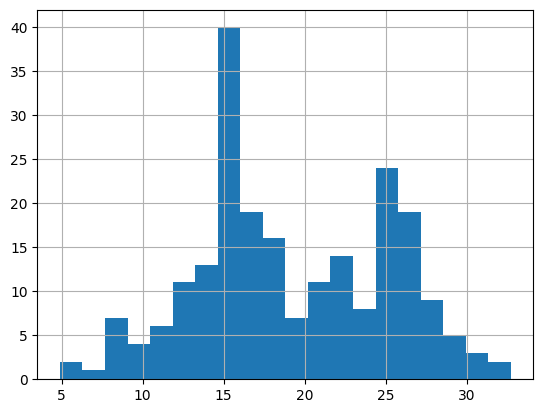

In [29]:
ws_data['10 Min Sampled Avg'].hist(bins=20)